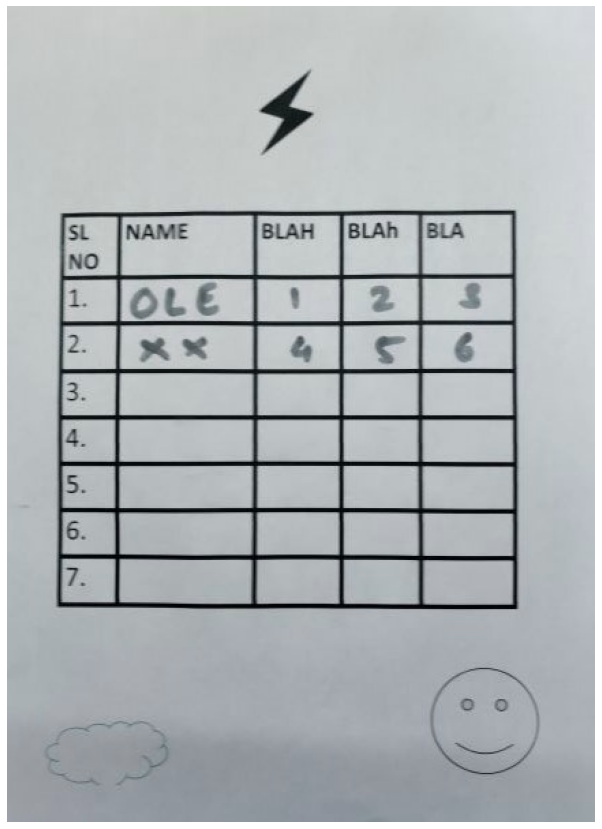

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

file_path = '../samples/form_cropped.jpg'

input_image = cv2.imread(file_path)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(input_image)
plt.show()

In [2]:
img = file_path

In [3]:
def findHorizontalLines(img):
    img = cv2.imread(img) 
    
    #convert image to greyscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # set threshold to remove background noise
    thresh = cv2.threshold(gray,128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # define rectangle structure (line) to look for: width 100, hight 1. This is a 
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (200,1))
    
    # Find horizontal lines
    lineLocations = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
    
    return lineLocations

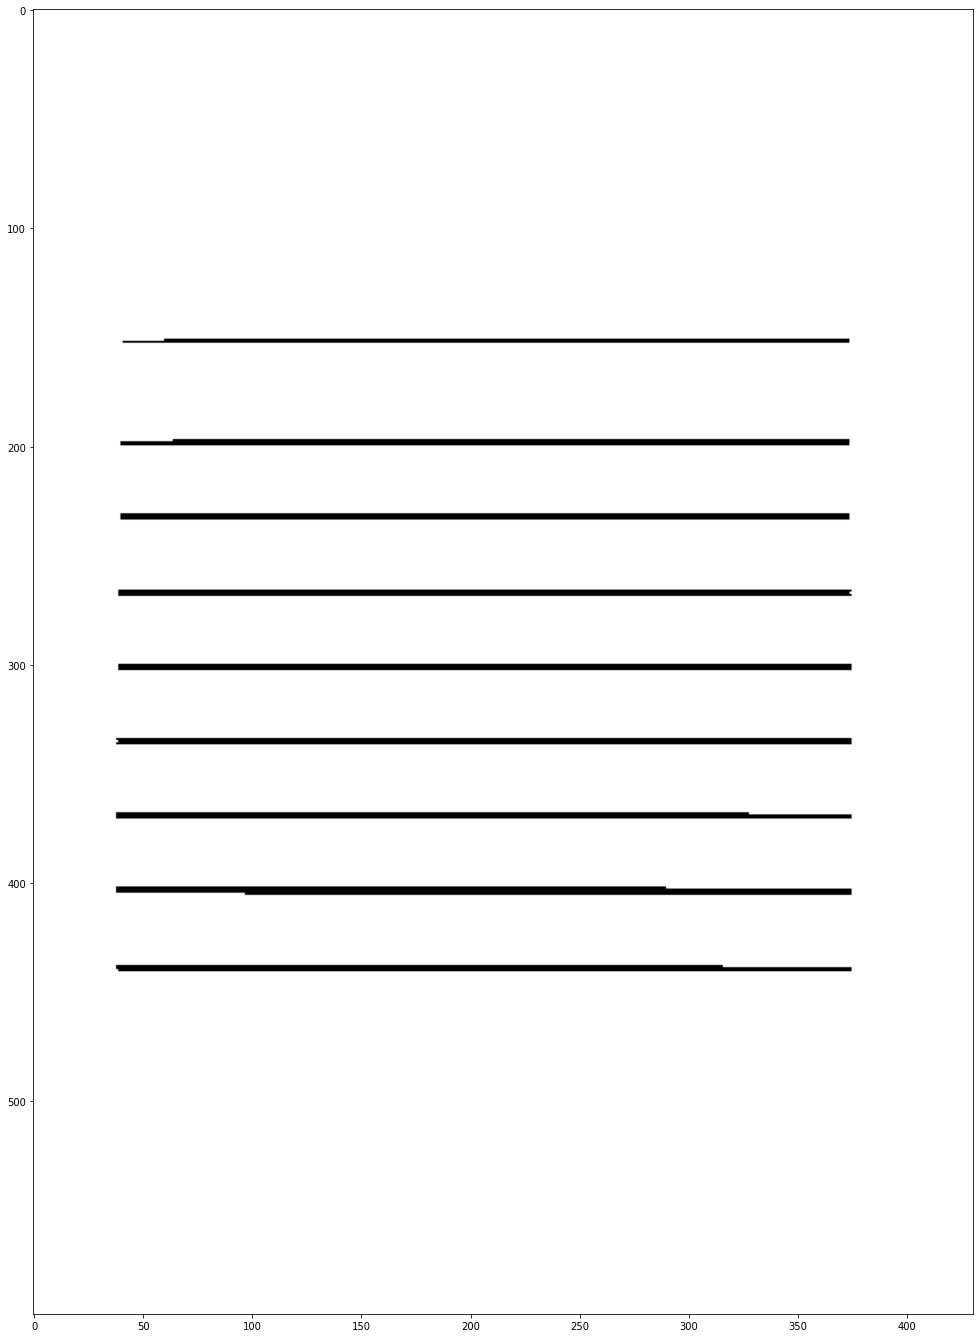

In [4]:
lineLocationsHorizontal = findHorizontalLines(img)
plt.figure(figsize=(24,24))
plt.imshow(lineLocationsHorizontal, cmap='Greys')

In [5]:
def findVerticalLines(img):
    img = cv2.imread(img) 
    
    #convert image to greyscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # set threshold to remove background noise
    thresh = cv2.threshold(gray,128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # define rectangle structure (line) to look for: width 100, hight 1. This is a 
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,200))
    
    # Find horizontal lines
    lineLocations = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=1)
    
    return lineLocations

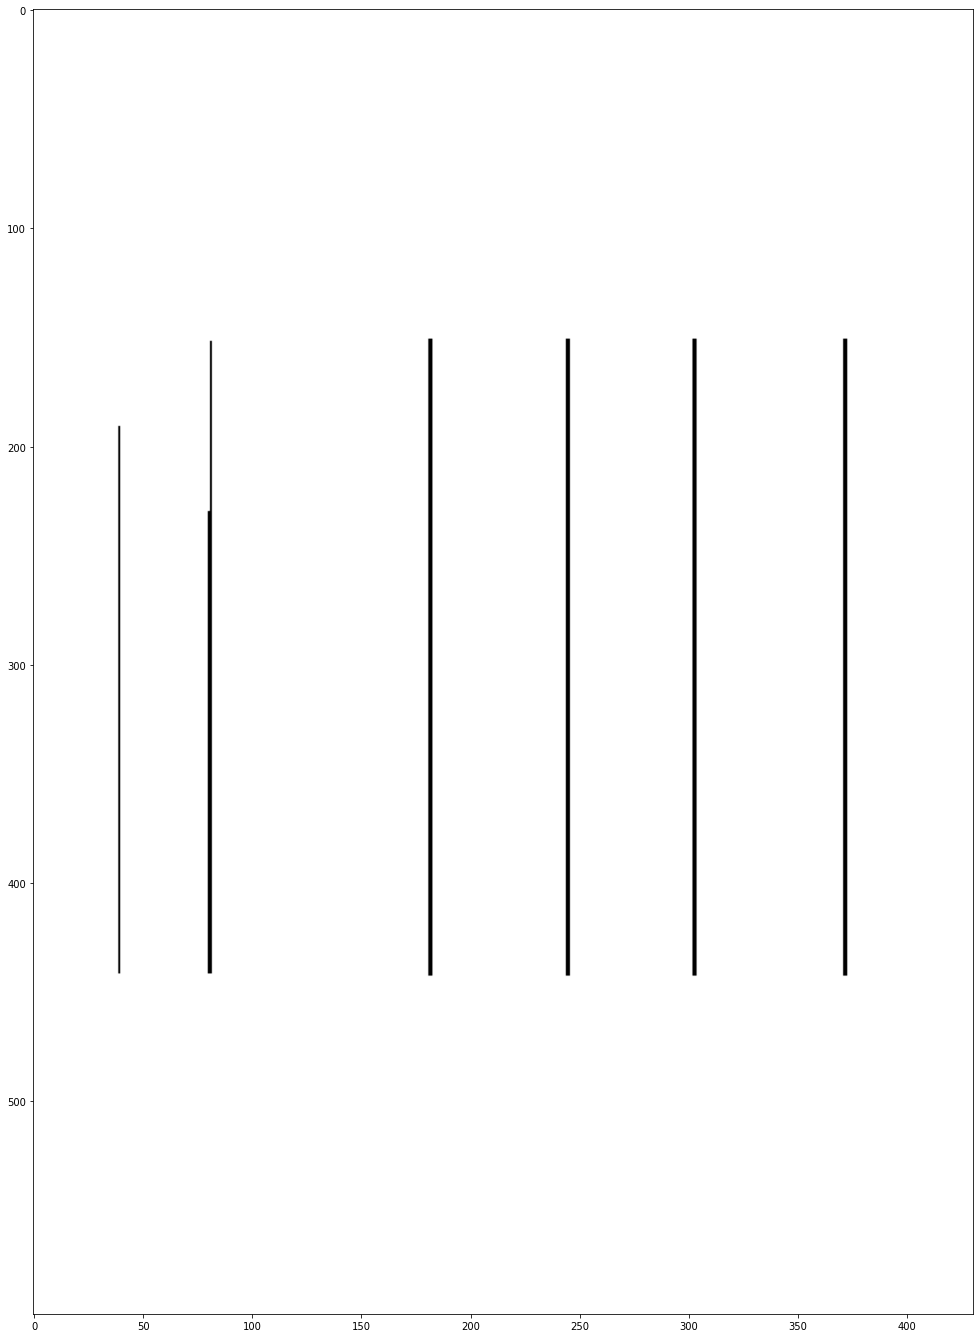

In [6]:
lineLocationsVertical = findVerticalLines(img)
plt.figure(figsize=(24,24))
plt.imshow(lineLocationsVertical, cmap='Greys')

In [7]:
import numpy as np

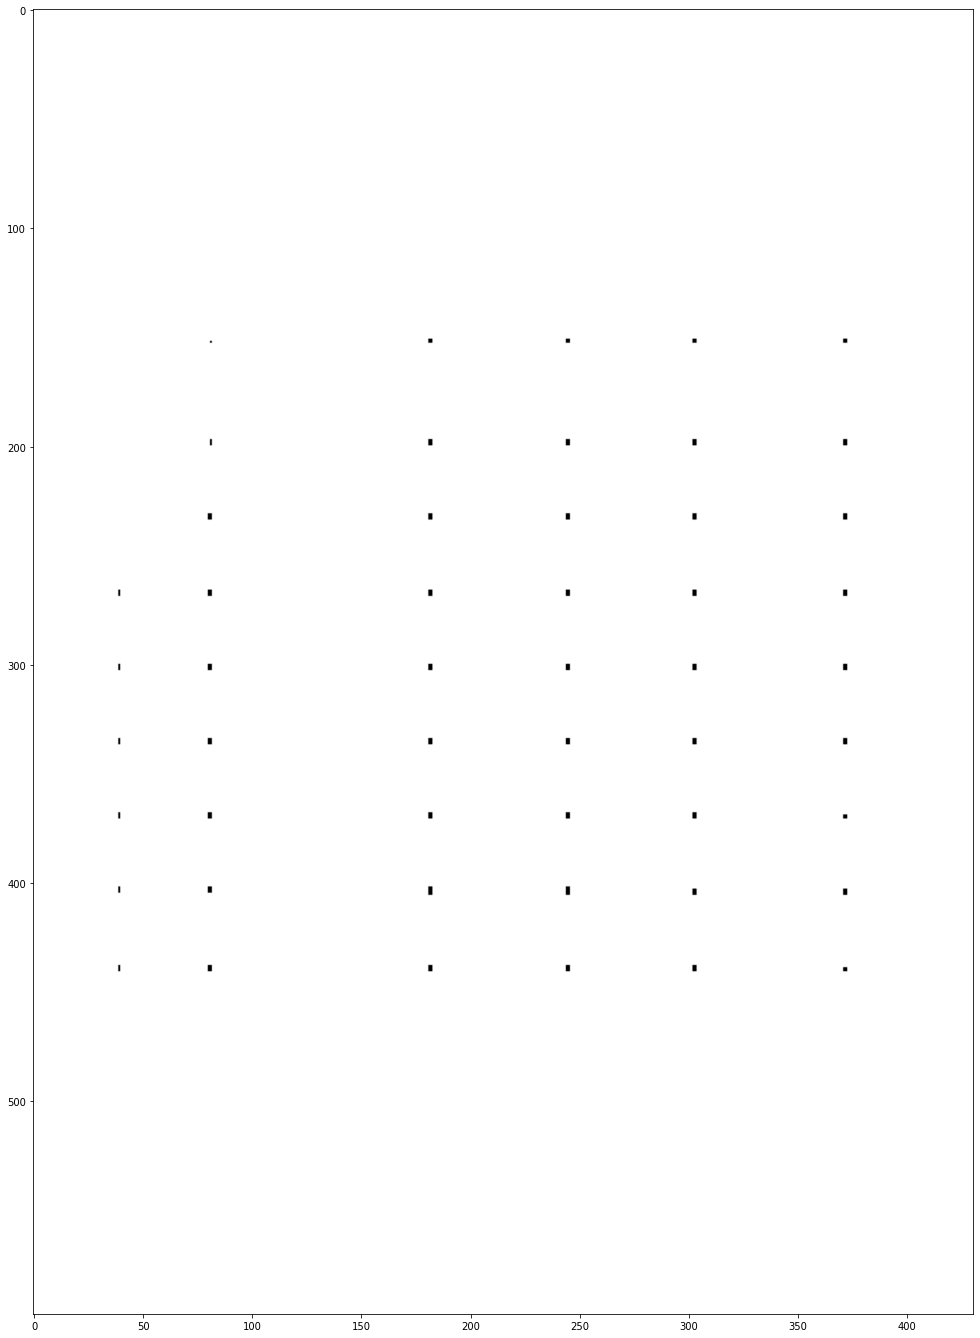

In [8]:
pointLoc = (lineLocationsHorizontal/2)+(lineLocationsVertical/2)
thresh1 = lambda x: x if x > 200 else 0
threshfunc = np.vectorize(thresh1)
pointsImg = threshfunc(pointLoc)
plt.figure(figsize=(24,24))
plt.imshow(pointsImg, cmap='Greys')